# Assignment 1: Find a path from the start to the goal

This assignment is worth 15/100 points. 

You need to do this assignment with a group of maximum 3 people in total.

You will program path-finding algorithms using informed and uninformed search and compare them. You will need to implement the following algorithms:

Uninformed Search: 
- BFS
- DFS

Informed Search:
- A*

Answer to all the questions in english, argument, and justify your answers using the obtained results.

### Deadline
March 3th, 2023 at 23.59

### Some Instructions
- You need to fill in your answers here and submit this jupyter notebook via NEO.
- It should run smoothly.
- Any compilation error will affect your total score. 


### Important before starting! 

- DO NOT copy the answers from internet nor from your classmates.
- If there are two or more groups that were discovered cheeting, then they will be penalized with 0/15.
- Use your brain and the material seen in class to program this assignment.
- You should be able to explain and modify your code according to your (or my) needs. 

### Names
You and your classmate names:
- Name 1
- Name 2
- Name 3


## Code for drawing the map

The following code will help you draw the map. You don't need to modify it.

#### Import libraries

In [9]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from queue import Queue
from queue import LifoQueue
from queue import PriorityQueue
import math

#### Read map from file and define where the start and goal positions are

In [10]:
map_file = "map1.txt"
start_char = '1'
goal_char = '4'
tree_char = '2'
water_char = '3'
visited_char = '5'

def read_map_file(file_name = "map1.txt"):
    i = 0
    j = 0
    my_map = []
    start = [0,0]
    goal  = [0,0]
    with open(file_name) as f:
        lines = f.readlines()
        for line in lines:
            line_arr = []
            j = 0
            for char in line:
                # skip carry char
                if char != '\n':
                    line_arr.append(int(char))
                # start char is 1
                if char == start_char:
                    start = [j, i]
                # end char is 3
                if char == goal_char:
                    goal = [j, i]

                j += 1
            my_map.append(line_arr)
            i += 1
        return my_map, start, goal

my_map, start, goal = read_map_file()
print('Start at:', start)
print('Goal at:', goal)

Start at: [2, 6]
Goal at: [16, 2]


#### Draw the map

In [11]:
# inspired by: https://stackoverflow.com/questions/38973868/adjusting-gridlines-and-ticks-in-matplotlib-imshow
def draw_map(my_map, path = []):
    xlen = len(my_map[0])
    ylen = len(my_map)
    colormap = colors.ListedColormap(["white","yellow",'lightgreen', 'cyan', 'red', 'Linen'])
    
    # set ticks top and bottom
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    
    plt.figure()
    im = plt.imshow(my_map, cmap = colormap)
    ax = plt.gca()

    # Major ticks
    ax.set_xticks(np.arange(0, xlen, 1))
    ax.set_yticks(np.arange(0, ylen, 1))

    # Labels for major ticks
    ax.set_xticklabels(np.arange(0, xlen, 1))
    ax.set_yticklabels(np.arange(0, ylen, 1))

    # Minor ticks
    ax.set_xticks(np.arange(-.5, xlen, 1), minor=True)
    ax.set_yticks(np.arange(-.5, ylen, 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)
    
    for step in path:
        plt.plot(step[0], step[1], marker='o', color='b')
        
    ax.text(start[0]-0.3, start[1]+ 0.3, 'S', fontsize=13)
    ax.text(goal[0]-0.3, goal[1]+ 0.3, 'G', fontsize=13)

    plt.show()

## Exercise Problem-Solver Agent

1. What is an Agent?

In [12]:
# here your answer
# an agent is any antity that is aware of its environment by using sensors and is capable of interacting with it by using actuators

2. What is a Problem-Solver Agent? Define a problem-solver agent to find the path between two points in a map.

In [13]:
# here your answer
# Problem-Solver Agents are a type of "intelligent agent"and 
# it should be capable to find a sequence of actions on the environment that will lead from an initial state to a desired goal state
#  Define a problem-solver agent to find the path between two points in a map : 
    # objective : find the path between two points in the map , recognizing and avoiding obstacles
    #Problem : 
    #  initial state : the first state given to the agent  ->  start_char = '1'
    # goal state  : state the agent is supposed to find -> goal_char = '4'
    # actions : the set of actions that the agent can perform to interact with the environment ->  move[up.down,left,right]
    # transition model : what is done after performing an action -> expand the environment in search of new successor states to explore 
        # ->  tf(state,actions)
    # goal test : test to determine if teh agent has reached th goal state -> is_goal(state, goal)
    # cost function : determines the cost for the agent to perform each action, depending on given rules
        # example: if state is 'land' then the cost of'move' is 1  / if  state is 'water' the cost of 'move' is 4
    

## Exercise Uninformed Search

#### color code:

Here is what every element in the map means:

- white (0):   blank space
- yellow (1):  starting position
- green (2):   trees
- cyan (3):    water
- red (4):     goal position
- brown (5):  expanded state (already visited)


For uninformed search let's suppose:
- the agent can't go through trees nor water (they are obstacles).
- the cost to go from one state to another is 1.

#### BFS

1. Implement BFS algorithm to find the path between start and goal. To help you out with this task you can complete the code below using what we have seen in class.

In [14]:
actions = ['U', 'D', 'L', 'R']
cost = 0

class State:
    def __init__(self):
        self.father = None
        self.value = None

def get_path(state, path):
    if (state.father != None):
        path.append(state.value)
        get_path(state.father, path)
        return path, len(path)

def goal_test(state, goal):
    if state == goal:return True
    return False

def tf(state, action, my_map):
    x = state.value[0]
    y = state.value[1]
    limit_x = len(my_map[0]) - 1
    limit_y = len(my_map) - 1
    next_state = None
    
    if action == 'L' and x > 0:
        next_state =  [x-1, y]
    elif action == 'R' and x < limit_x:
        next_state = [x+1, y]
    elif action == 'U' and y > 0:
        next_state = [x, y-1]
    elif action == 'D' and y < limit_y:
        next_state = [x, y+1]
    
    if next_state is not None:
        # verify if we already visited that state
        if my_map[next_state[1]][next_state[0]] != 5 and my_map[next_state[1]][next_state[0]] != 2 and  my_map[next_state[1]][next_state[0]] != 3:
            new_state = State()
            new_state.father = state
            new_state.value = next_state
            return True, new_state
        
    return False, _

def bfs(start, goal, actions, my_map):
    start_state = State()
    start_state.value = start
    open_states = Queue()
    open_states.put(start_state)
    
    while not open_states.empty():
        state = open_states.get()
        my_map[state.value[1]][state.value[0]] = int(visited_char)
        
        if (goal_test(state.value, goal)):
            return (True, state)
        
        for action in actions:
            succesor, new_state = tf(state, action, my_map)
            if (succesor == True):
                open_states.put(new_state)
        
    return False, _

Solution found?  True


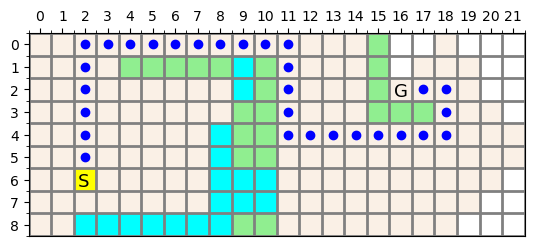

29


In [15]:
my_map, start, goal = read_map_file()
found, goal_state = bfs(start, goal, actions, my_map)
my_map[start[1]][start[0]] = 1# restore start position  color
print('Solution found? ', found)
p = []
path, cost = get_path(goal_state.father, p)
draw_map(my_map, path)
print(cost)

#### DFS

1. Implement DFS algorithm to find the path between start and goal.

In [16]:
actions = ['U', 'D', 'L', 'R']
path_taken=[]

class State:
    def __init__(self):
        self.father = None
        self.value = None

def get_path(state, path):
    if (state.father != None):
        path.append(state.value)
        get_path(state.father, path)
        return path, len(path)

def goal_test(state, goal):
    if state == goal:return True
    return False

def cost_function():
    return len(path_taken)

def tf(state, action, my_map):
    x = state.value[0]
    y = state.value[1]
    limit_x = len(my_map[0]) - 1
    limit_y = len(my_map) - 1
    next_state = None
    if action == 'L' and x > 0:
        next_state =  [x-1, y]
    elif action == 'R' and x < limit_x:
        next_state = [x+1, y]
    elif action == 'U' and y > 0:
        next_state = [x, y-1]
    elif action == 'D' and y < limit_y:
        next_state = [x, y+1]
    
    if next_state is not None:
        # verify if we already visited that state
        if my_map[next_state[1]][next_state[0]] != 5 and my_map[next_state[1]][next_state[0]] != 2 and  my_map[next_state[1]][next_state[0]] != 3 :
            new_state = State()
            new_state.father = state
            new_state.value = next_state
            return True, new_state
        
    return False, _

def dfs(start, goal, actions, my_map):
    start_state = State()
    start_state.value = start
    open_states = LifoQueue()
    open_states.put(start_state)
    
    while not open_states.empty():
        state = open_states.get()
        my_map[state.value[1]][state.value[0]] = int(visited_char)
        
        if (goal_test(state.value, goal)):
            return (True, state)
        
        for action in actions:
            succesor, new_state = tf(state, action, my_map)
            if (succesor == True):
                open_states.put(new_state)
        
    return False, _

Solution found?  True


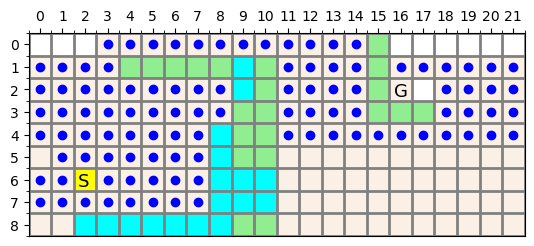

In [17]:
my_map, start, goal = read_map_file()
found, goal_state = dfs(start, goal, actions, my_map)
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
p =[]
path, cost = get_path(goal_state.father, p)
draw_map(my_map, path)

2. Now change the order of the actions. Do you have a shorter path (hint: to answer this, calculate the cost of the path and experiment with diferent order for the actions)? Why is that?

Solution found?  True


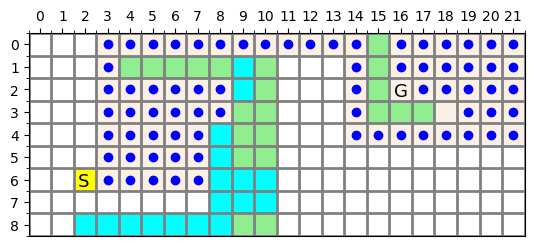

The algorithm cost was: 71
Solution found?  True


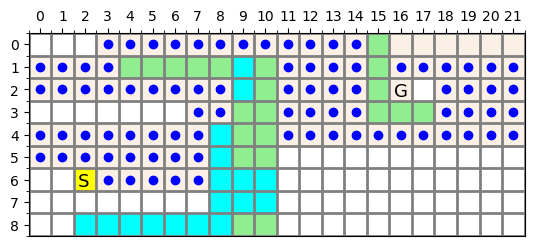

The algorithm cost was: 85
Solution found?  True


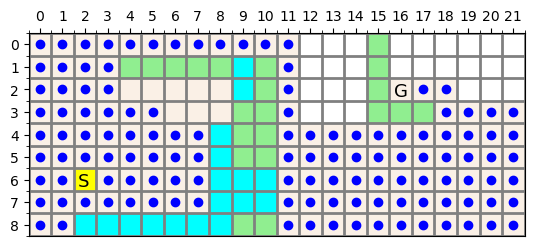

The algorithm cost was: 123


In [18]:
# your code here
list_of_actions = [['L', 'D', 'U', 'R'], ['D', 'U', 'L', 'R'], ['U', 'R', 'D', 'L']]
#DFS
for actions in list_of_actions:
    my_map, start, goal = read_map_file()
    found, goal_state = dfs(start, goal, actions, my_map)
    my_map[start[1]][start[0]] = 1
    print('Solution found? ', found)
    if found:
        p = []
        path, cost= get_path(goal_state.father, p)
        draw_map(my_map, path)
        print (f'The algorithm cost was: {cost}')

3. Does it happen the same thing when you change the order of actions for BFS (hint: to answer this calculate the cost of the path and experiment with diferent order for the actions)? Experiment, show your results and discuss.

Solution found?  True


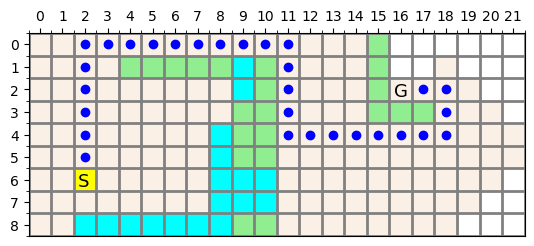

The algorithm cost was: 29
Solution found?  True


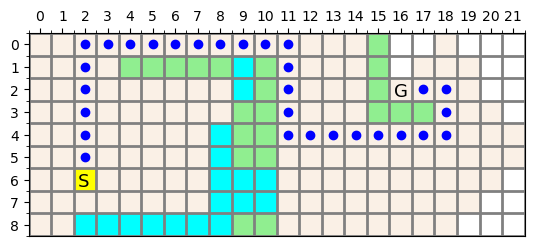

The algorithm cost was: 29
Solution found?  True


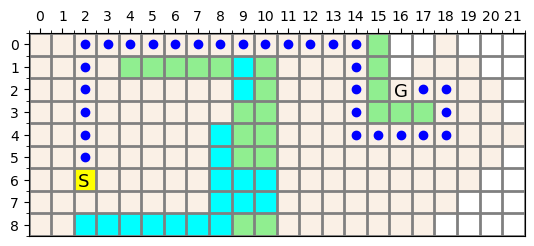

The algorithm cost was: 29


In [19]:
#BFS
for actions in list_of_actions:
    my_map, start, goal = read_map_file()
    found, goal_state = bfs(start, goal, actions, my_map)
    my_map[start[1]][start[0]] = 1
    print('Solution found? ', found)
    if found:
        p = []
        path, cost= get_path(goal_state.father, p)
        draw_map(my_map, path)
        print (f'The algorithm cost was: {cost}')

4. Did BFS or DFS find the optimal path? What is the cost of it? Give some examples

In [20]:
# your code here

5. Execute BFS and DFS for the map2.txt file. Which one finds a better path? Which one would you choose for the path-finding problem? 

Solution found?  True


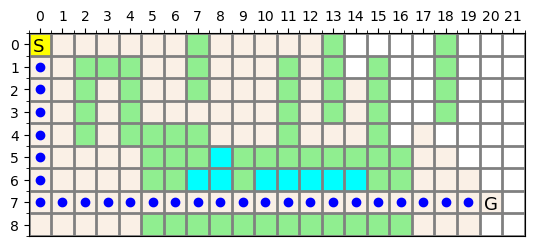

The algorithm cost was: 26
Solution found?  True


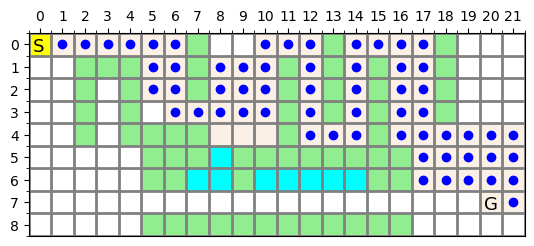

The algorithm cost was: 60


In [21]:
actions = ['U', 'D', 'L', 'R']

my_map, start, goal = read_map_file( file_name = "map2.txt")
found, goal_state = bfs(start, goal, actions, my_map)
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
p =[]
path, cost = get_path(goal_state.father, p)
draw_map(my_map, path)
print (f'The algorithm cost was: {cost}')

my_map, start, goal = read_map_file( file_name = "map2.txt")
found, goal_state = dfs(start, goal, actions, my_map)
my_map[start[1]][start[0]] = 1 # restore start position  color
print('Solution found? ', found)
p =[]
path, cost = get_path(goal_state.father, p)
draw_map(my_map, path)
print (f'The algorithm cost was: {cost}')

## Exercises Informed Search

1. Let's suppose:
- the agent can now go through trees and water.
- the cost to go from one state to another is:
    - empty spaces: 1
    - trees: 3
    - water: 5
    
Solve the problem using A* using the Manhattan distance as a heuristic. 

You may use map3.txt and map4.txt here.

In [22]:
from queue import PriorityQueue

In [23]:
actions = ['U', 'D', 'L', 'R']
path_taken=[]

class State:
    def __init__(self):
        self.father = None
        self.value = None
        self.f = None
        self.g = None
        self.h = None

def get_path(state, path):
    if (state.father != None):
        path.append(state.value)
        get_path(state.father, path)
        return path, len(path)

def goal_test(state, goal):
    if state == goal:return True
    return False

def cost_function():
    return len(path_taken)

def tf(state, action, my_map):
    x = state.value[0]
    y = state.value[1]
    limit_x = len(my_map[0]) - 1
    limit_y = len(my_map) - 1
    next_state = None
    if action == 'L' and x > 0:
        next_state =  [x-1, y]
    elif action == 'R' and x < limit_x:
        next_state = [x+1, y]
    elif action == 'U' and y > 0:
        next_state = [x, y-1]
    elif action == 'D' and y < limit_y:
        next_state = [x, y+1]
    
    if next_state is not None:
        # verify if we already visited that state
        if my_map[next_state[1]][next_state[0]] != 5 and my_map[next_state[1]][next_state[0]] != 2 and  my_map[next_state[1]][next_state[0]] != 3 :
            new_state = State()
            new_state.father = state
            new_state.value = next_state
            return True, new_state
        
    return False, _


In [24]:
# your code here
def a_star_search(start, goal, actions, my_map):
    open_states = PriorityQueue()    
    start_state = State()
    start_state.value = start
    
    open_states.put(0,start_state)
    closed_states = []
    
    while(open_states.isEmpty != True):
        state, f = open_states.get()
        closed_states.append(state)
        if state == goal:
            return True,'success'
        for a in actions:
            successor = tf(state, a)
            if successor in closed_states:
                continue
            successor.h = hf(successor)
            successor.g = state.g + cost_f(state, successor)
            successor.f = successor.h + successor.g
            
            if successor in open_states:
                index = my_list.index(successor)
                if successor.g >  open_states[index].g:
                    continue
            open_states.put(successor.f, successor)
                    
        

2. How many states expands A*?

In [25]:
# your answer here

3. Is A* optimal and complete for this case? Justify your answers

In [26]:
# your answer here

4. Create an empty map of 21x21 put the start position in one extreme, the goal position in another and execute BFS and A* in this map and compare both algorithms. Answer some questions such as: what is the states space? which one expands/visits less states? which one does a better job? 

In [27]:
# your answer here